# Data Loading and Examination

Import Statements and Libraries:

In [ ]:
# Standard Libraries
import pandas as pd
import numpy as np

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn Libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report, confusion_matrix ,r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, RandomForestClassifier

# Other Libraries
import statsmodels.api as sm
from itertools import chain, combinations
import operator
from scipy.stats import t

In [ ]:
# Load the dataset and display the first few rows
game_df = pd.read_csv("/content/clean_game.csv")
game_df.head()

,Age,Birthplace,Degree,GADT_Cat,GAD_T,Game,Gender,Hours,League_clean,Narcissism,...,Platform,Playstyle_clean,Residence,SPINT_Cat,SPIN_T,SWLT_Cat,SWL_T,Work,earnings_clean,whyplay_clean
0,25,USA,Bachelor (or equivalent),minimal anxiety,0,League of Legends,Male,25.0,gold,1.0,...,PC,Multiplayer - online - with real life friends,USA,None,3.0,Extremely satisfied,33,Employed,Fun,fun
1,36,Romania,Bachelor (or equivalent),mild anxiety,5,League of Legends,Male,5.0,unranked,3.0,...,PC,Multiplayer - online - with strangers,Romania,Moderate,31.0,Satisfied,26,Employed,Fun,fun
2,23,UK,High school diploma (or equivalent),minimal anxiety,0,League of Legends,Female,9.0,silver,4.0,...,PC,Multiplayer - online - with real life friends,UK,Moderate,39.0,Satisfied,26,Employed,Fun,improving
3,25,USA,Master (or equivalent),minimal anxiety,1,League of Legends,Male,7.0,gold,2.0,...,PC,Multiplayer - online - with strangers,USA,Mild,29.0,Slightly satisfied,21,Student at college / university,Fun,fun
4,18,USA,High school diploma (or equivalent),moderate anxiety,11,League of Legends,Male,25.0,unranked,3.0,...,PC,Multiplayer - online - with strangers,USA,None,17.0,dissatisfied,10,Student at college / university,Fun,improving


Dependent Variable:- GAD_T (Anxiet Score)
Independent Variables:- SWL_T, SPIN_T, Narcississm, whyplay_clean, Work, Playstyle_clean.

Other variables that we are not considering from our dataset such as gender, residence country, etc. which were extremely skewed and would mess up our analysis. Considering our dataset is skewed in most of the variables we tried to as careful as we could for the models.

This next step, we did frequency encoding for our categorical independent variables so that we don't have to encode for each and every model seperately.

In [ ]:
# Apply frequency encoding to the specified features
for feature in ['whyplay_clean', 'Work', 'Playstyle_clean']:
    freq_map = game_df[feature].value_counts(normalize=True)
    game_df[feature + '_freq_encoded'] = game_df[feature].map(freq_map)

# Display the first few rows of the frequency encoded features
encoded_features = game_df[['whyplay_clean_freq_encoded', 'Work_freq_encoded', 'Playstyle_clean_freq_encoded']]
encoded_features.head()

,whyplay_clean_freq_encoded,Work_freq_encoded,Playstyle_clean_freq_encoded
0,0.405344,0.198942,0.454631
1,0.405344,0.198942,0.305354
2,0.383344,0.198942,0.454631
3,0.405344,0.537154,0.305354
4,0.383344,0.537154,0.305354


Move this to before creating the clean dataset

# 1. Linear Regressions

## Train-Test Split

In [ ]:
# Splitting the dataset into training and testing sets:
X = game_df[["Narcissism","Hours", "SPIN_T", "SWL_T", "whyplay_clean_freq_encoded", "Work_freq_encoded", "Playstyle_clean_freq_encoded"]]
y = game_df["GAD_T"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape

((8472, 7), (2119, 7))

## 1 a) Linear Regression

### Function to loop through each and every independent variable and run linear Regression and give the results

In [ ]:
# Function to loop through each and every independent variable:
def simple_linear_regression(X_train, y_train, X_test, independent_var):

    X_train_single = X_train[independent_var].values.reshape(-1, 1)
    X_test_single = X_test[independent_var].values.reshape(-1, 1)

    lr = LinearRegression()
    lr.fit(X_train_single, y_train)
    predictions = lr.predict(X_test_single)

    return lr, X_train_single, X_test_single, predictions

### Function to perform regression analysis for each feature and plot the results with intervals.

In [ ]:
# Function to perform regression analysis for each feature and plot the results with intervals:
def main_regression_analysis_with_intervals(X_train, y_train, X_test, y_test, features):

    results = []

    for feature in features:
        # Perform regression for the current feature:
        lr_model, X_train_single, X_test_single, predictions = simple_linear_regression(X_train, y_train, X_test, feature)

        # Plot the regression results with intervals:
        plot_title = f"GAD_T vs {feature}"
        plot_regression_with_intervals(X_train_single, y_train, X_test_single, y_test, predictions, plot_title, lr_model)

        # Compute correlation and mean squared error:
        correlation = np.corrcoef(y_test, predictions)[0, 1]
        mse = mean_squared_error(y_test, predictions)
        r2 = r2_score(y_test, predictions)

        # Calculating residuals for each variable linear regression:
        residuals = y_test - predictions_multi
        linearity_assumption = "Yes" if r2 > 0.2 and residuals.abs().mean() < 10 else "No"

        results.append((feature, correlation, mse, r2, linearity_assumption))

    return results

### Plotting regression results with confidence and prediction intervals.

In [ ]:
def plot_regression_with_intervals(X_train_single, y_train, X_test_single, y_test, predictions, title, model):

    plt.figure(figsize=(10, 6))

    # Convert to 1D arrays for plotting:
    X_train_single = X_train_single.ravel()
    X_test_single = X_test_single.ravel()
    predictions = predictions.ravel()

    # Sort values for plotting:
    sort_axis = operator.itemgetter(0)
    sorted_zip = sorted(zip(X_test_single, predictions), key=sort_axis)
    X_test_single, predictions = zip(*sorted_zip)

    # Calculating the standard error of the estimate:
    n = X_train_single.shape[0]
    mse = np.sum((y_train - model.predict(X_train_single.reshape(-1, 1)))**2) / (n - 2)
    se = np.sqrt(mse)

    # Confidence interval:
    alpha = 0.05  # 95% confidence interval
    dof = n - 2
    t_val = t.ppf(1 - alpha/2, dof)
    conf_interval = t_val * se * np.sqrt(1/n + (X_test_single - np.mean(X_train_single))**2/np.sum((X_train_single - np.mean(X_train_single))**2))

    # Prediction interval:
    pred_interval = t_val * se * np.sqrt(1 + 1/n + (X_test_single - np.mean(X_train_single))**2/np.sum((X_train_single - np.mean(X_train_single))**2))

    plt.scatter(X_train_single, y_train, color='blue', s=10, label="Train data")
    plt.scatter(X_test_single, y_test, color='red', s=10, label="Test data")
    plt.plot(X_test_single, predictions, color='green', linewidth=2, label="Regression Line")
    plt.fill_between(X_test_single, predictions - conf_interval, predictions + conf_interval, color='gray', alpha=0.3, label="95% Confidence Interval")
    plt.fill_between(X_test_single, predictions - pred_interval, predictions + pred_interval, color='gray', alpha=0.5, label="95% Prediction Interval")

    plt.title(title)
    plt.xlabel(title.split(" vs ")[1])
    plt.ylabel(title.split(" vs ")[0])
    plt.legend()
    plt.grid(True)
    plt.show()


### Calling the Linear Regression Function to run regression for individual features and displaying the results and plots:

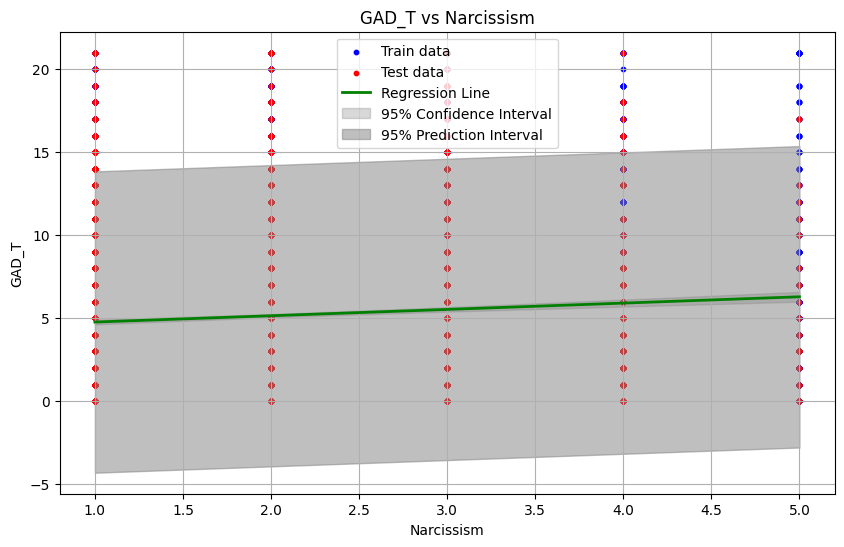

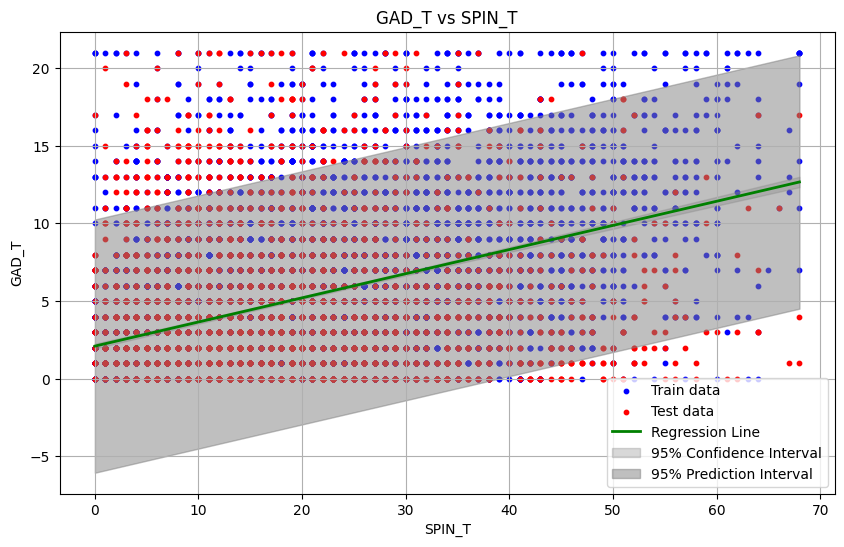

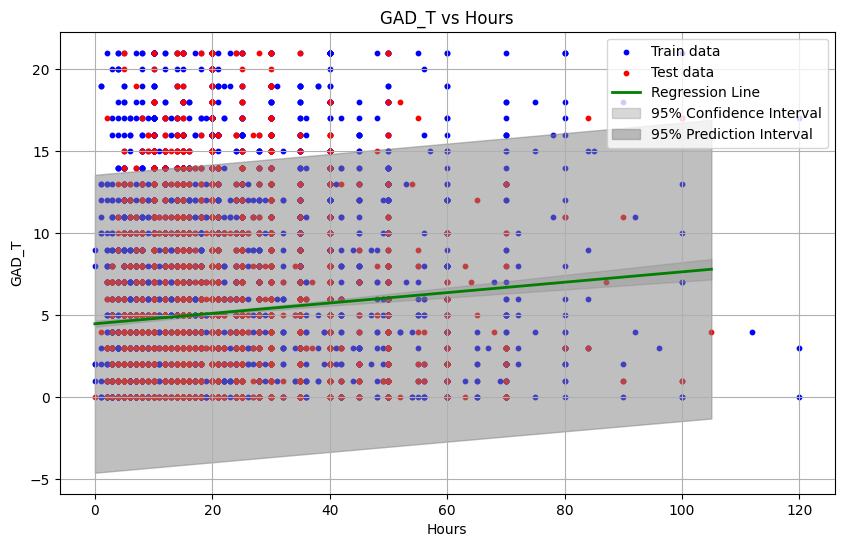

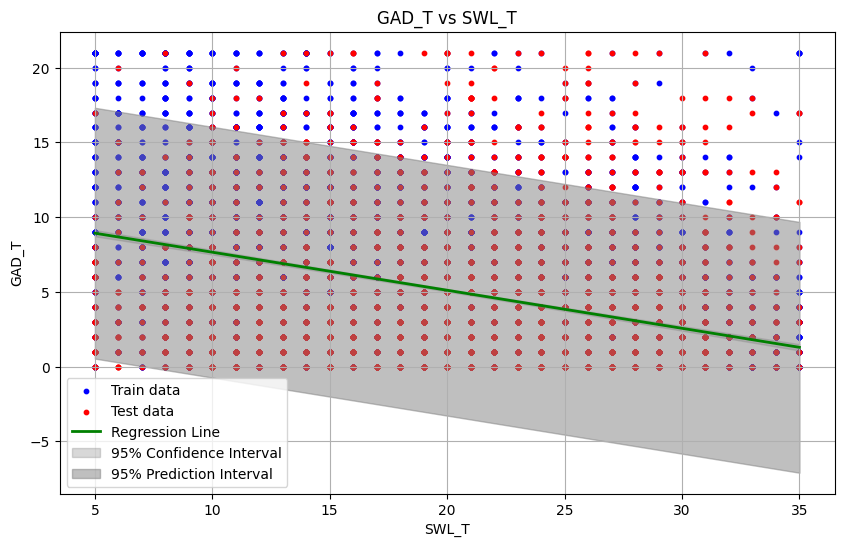

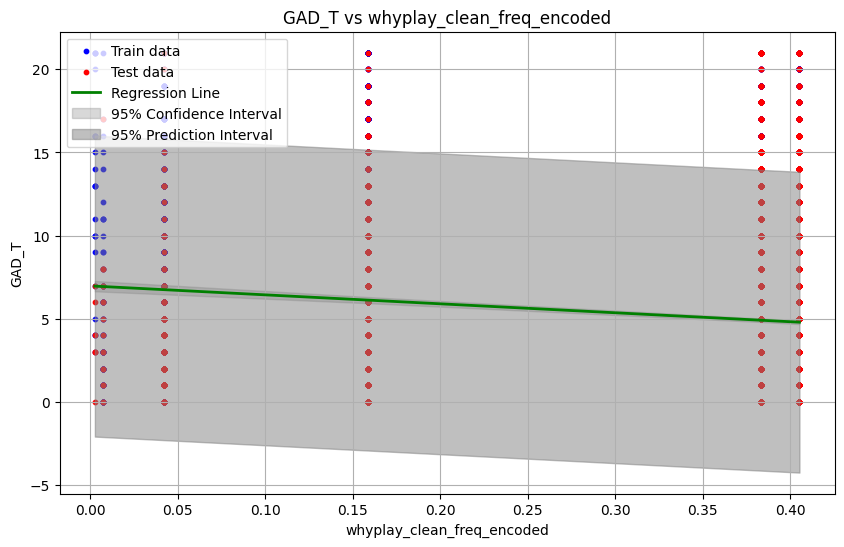

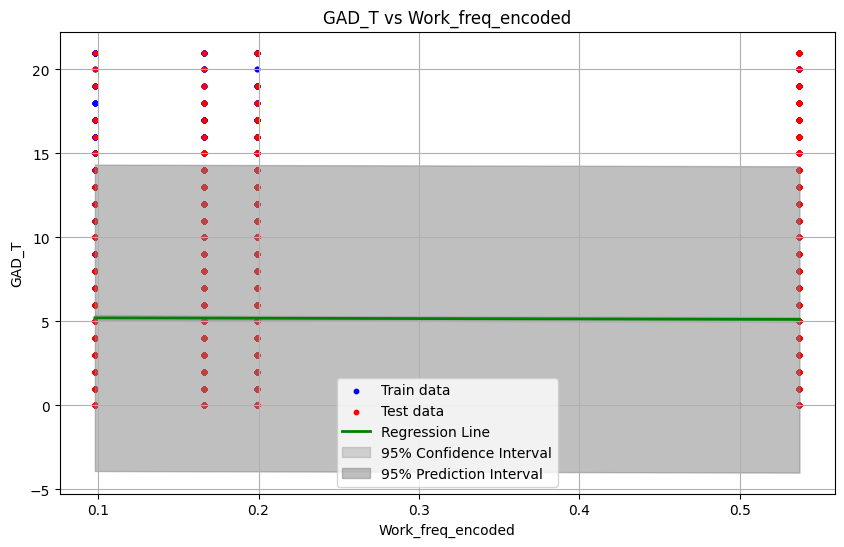

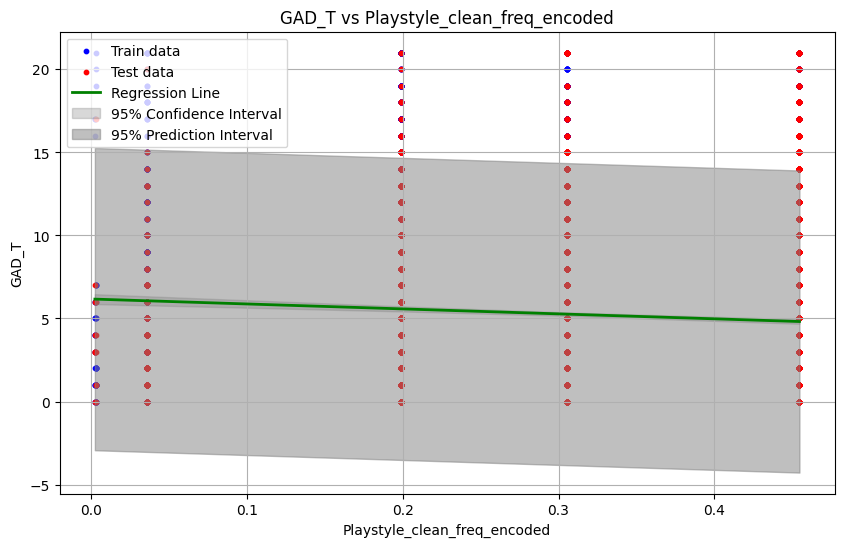

[('Narcissism',
  0.0328252883418951,
  22.548577019344748,
  -0.001961405181236664,
  'No'),
 ('SPIN_T', 0.4823824036824145, 17.3087032239395, 0.2308759621840034, 'Yes'),
 ('Hours',
  0.09612500873633444,
  22.307360590362098,
  0.008757211427204203,
  'No'),
 ('SWL_T', 0.4050639387511801, 18.827819677657327, 0.1633729860407539, 'No'),
 ('whyplay_clean_freq_encoded',
  0.11865233399365668,
  22.197061706731258,
  0.013658417580384663,
  'No'),
 ('Work_freq_encoded',
  0.06189679913985132,
  22.490471348833033,
  0.0006205599345651125,
  'No'),
 ('Playstyle_clean_freq_encoded',
  0.047618796779909434,
  22.47923184471596,
  0.0011199949689364441,
  'No')]

In [ ]:
# List of independent features:
features = ["Narcissism", "SPIN_T", "Hours", "SWL_T", "whyplay_clean_freq_encoded", "Work_freq_encoded", "Playstyle_clean_freq_encoded"]

# Calling the main function to plot regression results with intervals:
results_with_intervals = main_regression_analysis_with_intervals(X_train, y_train, X_test, y_test, features)
results_with_intervals

### Intercept and Coefficients

In [ ]:
# Compute the intercept and coefficients for the regression model:
lr_multi = LinearRegression()
lr_multi.fit(X_train, y_train)
predictions_multi = lr_multi.predict(X_test)
intercept = lr_multi.intercept_
coefficients = lr_multi.coef_

print("The intercept after linear regression:",intercept)

print("Feature ranks by the magnitude of their coefficients:")
# Pairing the feature names with their respective coefficients:
feature_coefficients = dict(zip(features, coefficients))

# Ranking the features by the magnitude of their coefficients:
sorted_features = sorted(feature_coefficients.items(), key=lambda x: abs(x[1]), reverse=True)

sorted_features

The intercept after linear regression: 6.257917418814023
Feature ranks by the magnitude of their coefficients:


[('whyplay_clean_freq_encoded', -2.9472759792159877),
 ('Work_freq_encoded', 0.6648876016362912),
 ('Narcissism', 0.3376492930253228),
 ('Playstyle_clean_freq_encoded', -0.21394735131423487),
 ('SWL_T', -0.17866427544801958),
 ('Hours', 0.12419096613795266),
 ('SPIN_T', 0.006705640455700115)]

### Predictive Power of Features

In [ ]:
# statsmodels to get detailed statistics of the regression model:

X_train_sm = sm.add_constant(X_train)
model_sm = sm.OLS(y_train, X_train_sm).fit()
model_sm.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  GAD_T   R-squared:                       0.285
Model:                            OLS   Adj. R-squared:                  0.284
Method:                 Least Squares   F-statistic:                     482.0
Date:                Mon, 23 Oct 2023   Prob (F-statistic):               0.00
Time:                        05:25:55   Log-Likelihood:                -23619.
No. Observations:                8472   AIC:                         4.725e+04
Df Residuals:                    8464   BIC:                         4.731e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            6.2579      0.270     23.146      0.000       5.728       6.788
Narcissism                       0.3376      0.041      8.317      0.000       0.258       0.417
Hours                            0.0067      0.003      2.067      0.039       0.000       0.013
SPIN_T                           0.1242      0.003     36.865      0.000       0.118       0.131
SWL_T                           -0.1787      0.006    -27.991      0.000      -0.191      -0.166
whyplay_clean_freq_encoded      -2.9473      0.386     -7.627      0.000      -3.705      -2.190
Work_freq_encoded                0.6649      0.230      2.885      0.004       0.213       1.117
Playstyle_clean_freq_encoded    -0.2139      0.365     -0.586      0.558      -0.930       0.502
==============================================================================
Omnibus:                     1215.641   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2030.913
Skew:                           0.965   Prob(JB):                         0.00
Kurtosis:                       4.424   Cond. No.                         363.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# Is it a predictive feature? (For each feature):
feature_significance = {}
p_values = model_sm.pvalues.drop("const")
for feature, p_value in p_values.items():
    feature_significance[feature] = "Yes" if p_value <= 0.05 else "No"

# Which are the most predictive features according to the training data?:
sorted_features_by_coef = sorted(feature_coefficients.items(), key=lambda x: abs(x[1]), reverse=True)
most_predictive_features = [feature[0] for feature in sorted_features_by_coef]

print("Is the feature significant?:",feature_significance)
print("most predictive features Sorted:",most_predictive_features)

Is the feature significant?: {'Narcissism': 'Yes', 'Hours': 'Yes', 'SPIN_T': 'Yes', 'SWL_T': 'Yes', 'whyplay_clean_freq_encoded': 'Yes', 'Work_freq_encoded': 'Yes', 'Playstyle_clean_freq_encoded': 'No'}
most predictive features Sorted: ['whyplay_clean_freq_encoded', 'Work_freq_encoded', 'Narcissism', 'Playstyle_clean_freq_encoded', 'SWL_T', 'Hours', 'SPIN_T']


### Residual Analysis

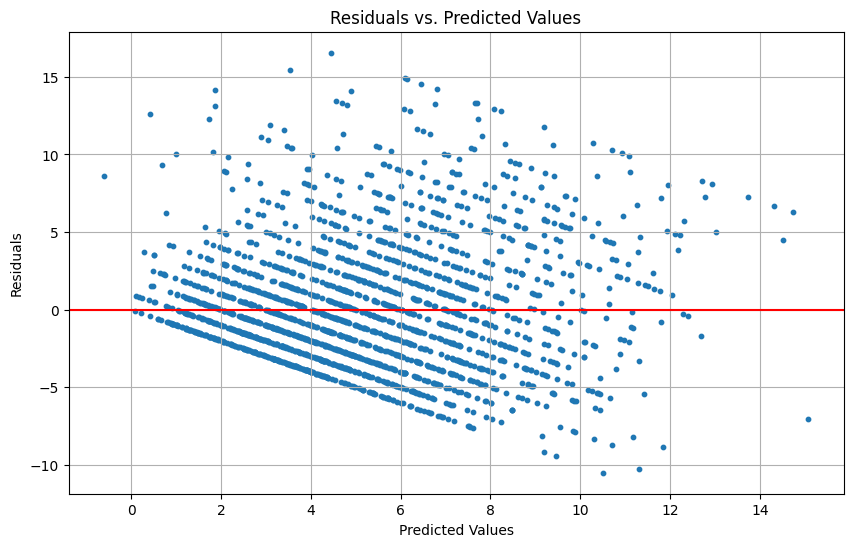

In [ ]:
# Plot residuals against predicted values:
residuals = y_test - predictions_multi
plt.figure(figsize=(10, 6))
plt.scatter(predictions_multi, residuals, s=10)
plt.axhline(y=0, color='r', linestyle='-')
plt.title("Residuals vs. Predicted Values")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.grid(True)
plt.show()

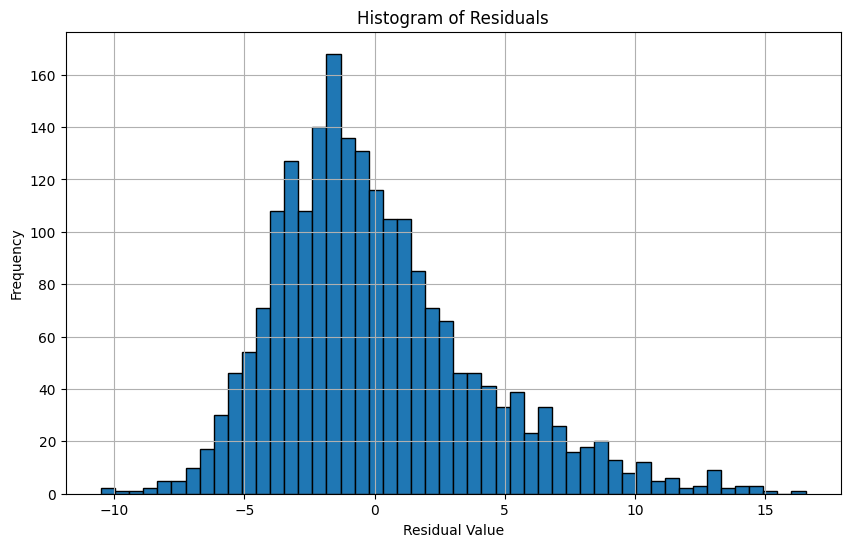

In [ ]:
# Plot histogram of residuals:
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=50, edgecolor='black')
plt.title("Histogram of Residuals")
plt.xlabel("Residual Value")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

## 1 b) Multivariate Regression Analysis

### Multivariate Regression Analysis

In [ ]:
# Function to compute all possible combinations of the independent variables:
def get_combinations(features):
    return chain(*map(lambda x: combinations(features, x), range(0, len(features)+1)))

# Get all combinations of the independent variables:
feature_combinations = list(get_combinations(["Narcissism", "SPIN_T", "SWL_T", "whyplay_clean_freq_encoded", "Work_freq_encoded",
                                              "Playstyle_clean_freq_encoded"]))

results = []

for combo in feature_combinations:
    if len(combo) == 0:
        continue
    X_train_combo = X_train[list(combo)]
    X_test_combo = X_test[list(combo)]

    lr_combo = LinearRegression()
    lr_combo.fit(X_train_combo, y_train)
    predictions_combo = lr_combo.predict(X_test_combo)

    r2 = r2_score(y_test, predictions_combo)

    correlation_combo = np.corrcoef(y_test, predictions_combo)[0, 1]
    mse_combo = mean_squared_error(y_test, predictions_combo)

    results.append((combo, correlation_combo, mse_combo, lr_combo.coef_, r2))

# Sorting results by correlation value and getting the best performing combination:
sorted_results = sorted(results, key=lambda x: x[1], reverse=True)
best_combination = sorted_results[0]

best_combination


(('SPIN_T', 'SWL_T', 'whyplay_clean_freq_encoded'),
 0.5491098254854373,
 15.732036939378355,
 array([ 0.12446499, -0.17894889, -3.25617789]),
 0.3009362043281292)

#### Coefficients for each feature and Most Predictive Feature Ranking:

In [ ]:
# Extracting feature names and their respective coefficients for the best-performing combination:
best_features = best_combination[0]
best_coefficients = best_combination[3]

feature_coefficients_best_combo = dict(zip(best_features, best_coefficients))

print("Most Predictive feature Ranking:")
# Ranking the features by the absolute values of their coefficients:
sorted_features_best_combo = sorted(feature_coefficients_best_combo.items(), key=lambda x: abs(x[1]), reverse=True)
sorted_features_best_combo

Most Predictive feature Ranking:


[('whyplay_clean_freq_encoded', -3.256177885448035),
 ('SWL_T', -0.17894889247521875),
 ('SPIN_T', 0.12446498889565774)]

#### Prediction Accuracy

In [ ]:
# Displaying the correlation and MSE for the best-performing combination:
best_combination[1], best_combination[2]

(0.5491098254854373, 15.732036939378355)

## 1 c) Regularization

### Regularization

In [ ]:
# Function to perform regularization experiments for both Ridge and Lasso:
def regularization_experiment(X_train, y_train, X_test, y_test):
    results = {}

    # Ridge Regression:
    ridge = Ridge(alpha=1.0)
    ridge.fit(X_train, y_train)
    predictions_ridge = ridge.predict(X_test)
    correlation_ridge = np.corrcoef(y_test, predictions_ridge)[0, 1]
    mse_ridge = mean_squared_error(y_test, predictions_ridge)
    r2 = r2_score(y_test, predictions_ridge)
    results["Ridge"] = (correlation_ridge, mse_ridge, r2)

    # Lasso Regression:
    lasso = Lasso(alpha=1.0)
    lasso.fit(X_train, y_train)
    predictions_lasso = lasso.predict(X_test)
    correlation_lasso = np.corrcoef(y_test, predictions_lasso)[0, 1]
    mse_lasso = mean_squared_error(y_test, predictions_lasso)
    r2 = r2_score(y_test, predictions_lasso)
    results["Lasso"] = (correlation_lasso, mse_lasso, r2)

    return results

# Regularization experiments for univariate and multivariate regressions:
regularization_results_univariate = {}
for feature in ["whyplay_clean_freq_encoded", "SPIN_T", "SWL_T"]:
    X_train_single = X_train[feature].values.reshape(-1, 1)
    X_test_single = X_test[feature].values.reshape(-1, 1)
    regularization_results_univariate[feature] = regularization_experiment(X_train_single, y_train, X_test_single, y_test)
regularization_results_multivariate = regularization_experiment(X_train, y_train, X_test, y_test)

print("Regularization results for univariate:",regularization_results_univariate)
print("Regularization results for Multivariate:",regularization_results_multivariate)

Regularization results for univariate: {'whyplay_clean_freq_encoded': {'Ridge': (0.11865233399365668, 22.19663226968811, 0.013677499908410162), 'Lasso': (1.4419670651941595e-16, 22.51248444486643, -0.0003576070076367621)}, 'SPIN_T': {'Ridge': (0.4823824036824144, 17.30870377478805, 0.23087593770667225), 'Lasso': (0.48238240368241436, 17.344407194559363, 0.22928943188800566)}, 'SWL_T': {'Ridge': (0.40506393875118035, 18.82782034237062, 0.16337295650376504), 'Lasso': (0.40506393875118035, 18.869840607218475, 0.16150575736401795)}}
Regularization results for Multivariate: {'Ridge': (0.5477978000626571, 15.760562488743263, 0.29966865207856996), 'Lasso': (0.5462940040356477, 15.850063871042298, 0.2956915970876023)}


## 1 d) Multi run Analysis

### Multiple Runs Analysis

In [ ]:
# Function to perform analyses (a), (b), and (c) for a given train-test split:
def analyze_split(X_train, y_train, X_test, y_test):
    results = {}

    # (a) Univariate regression for each independent variable:
    univariate_results = {}
    for feature in ["whyplay_clean_freq_encoded", "SPIN_T", "SWL_T"]:
        X_train_single = X_train[feature].values.reshape(-1, 1)
        X_test_single = X_test[feature].values.reshape(-1, 1)

        lr = LinearRegression()
        lr.fit(X_train_single, y_train)
        predictions = lr.predict(X_test_single)

        correlation = np.corrcoef(y_test, predictions)[0, 1]
        mse = mean_squared_error(y_test, predictions)
        r2 = r2_score(y_test, predictions)

        univariate_results[feature] = (correlation, mse , r2)
    results["Univariate"] = univariate_results

    # (b) Multivariate regression using all features:
    lr_multi = LinearRegression()
    lr_multi.fit(X_train, y_train)
    predictions_multi = lr_multi.predict(X_test)

    correlation_multi = np.corrcoef(y_test, predictions_multi)[0, 1]
    mse_multi = mean_squared_error(y_test, predictions_multi)

    r2 = r2_score(y_test, predictions_multi)

    results["Multivariate"] = (correlation_multi, mse_multi, r2)

    # (c) Regularization:
    results["Regularization"] = regularization_experiment(X_train, y_train, X_test, y_test)

    return results

# Repeating the analyses multiple times with different random train-test splits:
runs = 10
multi_run_results = []

for _ in range(runs):
    X_train_rand, X_test_rand, y_train_rand, y_test_rand = train_test_split(X, y, test_size=0.2)
    results_rand = analyze_split(X_train_rand, y_train_rand, X_test_rand, y_test_rand)
    multi_run_results.append(results_rand)

multi_run_results


[{'Univariate': {'whyplay_clean_freq_encoded': (0.12409759792368609,
    21.949999159340322,
    0.015395936752964912),
   'SPIN_T': (0.44954933113754564, 17.78921051842815, 0.20203509661876218),
   'SWL_T': (0.3952037889202006, 18.81634212848481, 0.15596138384046743)},
  'Multivariate': (0.5414600617288107,
   15.776921073487037,
   0.29229971802194976),
  'Regularization': {'Ridge': (0.5414553821018578,
    15.777121681895142,
    0.29229071939501095),
   'Lasso': (0.5306907364620455, 16.08124995755724, 0.2786485350016784)}},
 {'Univariate': {'whyplay_clean_freq_encoded': (0.09103303137422109,
    21.594690621127725,
    0.006418019732053026),
   'SPIN_T': (0.44955496727089883, 17.345963202312213, 0.20190398785586894),
   'SWL_T': (0.40041950808411275, 18.252473754565944, 0.16019500644722406)},
  'Multivariate': (0.5293586685496274, 15.645082297696861, 0.2801623267715576),
  'Regularization': {'Ridge': (0.5294229641452136,
    15.643598960093701,
    0.2802305758397666),
   'Lasso': 

# 2 Logistic Regression


## 2 a) logistic regression model and analysis

### Logistic Regression Analysis

In [ ]:
# Using the features of best combination from 1(b):
X = game_df[[ "SPIN_T", "SWL_T", "whyplay_clean_freq_encoded"]]

# Categorizing the dependent variable, GAD_T, based on its median:
median_gad_t = game_df['GAD_T'].median()
game_df['GAD_T_cat'] = (game_df['GAD_T'] > median_gad_t).astype(int)

# Splitting the data into training and testing sets:
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X, game_df['GAD_T_cat'], test_size=0.2, random_state=42)

# Fitting the logistic regression model:
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train_log, y_train_log)

X_train_sm = sm.add_constant(X_train_log)

# Fitting the logistic regression model using statsmodels with the Logit method:
logit_model_sm = sm.Logit(y_train_log, X_train_sm)
result_sm = logit_model_sm.fit()

# Displaying the model summary:
summary_logit = result_sm.summary()
summary_logit


Optimization terminated successfully.
         Current function value: 0.579310
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              GAD_T_cat   No. Observations:                 8472
Model:                          Logit   Df Residuals:                     8468
Method:                           MLE   Df Model:                            3
Date:                Mon, 23 Oct 2023   Pseudo R-squ.:                  0.1561
Time:                        04:18:33   Log-Likelihood:                -4907.9
converged:                       True   LL-Null:                       -5815.8
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.6912      0.114      6.086      0.000       0.469       0.914
SPIN_T                         0.0550      0.002     26.545      0.000       0.051       0.059
SWL_T                         -0.0790      0.004    -21.474      0.000      -0.086      -0.072
whyplay_clean_freq_encoded    -1.3687      0.218     -6.270      0.000      -1.797      -0.941
==============================================================================================
"""

### Intercept Coefficients,

In [ ]:
# Extracting intercept:

intercept_log = log_reg.intercept_[0]
print("Intercept:",intercept_log)
print("\n")
# Extract coefficients and p-values from the results:

coefficients = result_sm.params
print("Coefficient\n",coefficients)
print("\n")
p_values = result_sm.pvalues
print("p_values:\n",p_values)
print("\n")
# Calculating odds ratios for the coefficients:
odds_ratios = np.exp(coefficients)

# Extracting log odds and odds ratios for the predictors:
log_odds_and_ratios = pd.DataFrame({
    "Predictor": ["SPIN_T", "SWL_T", "whyplay_clean_freq_encoded"],
    "Log Odds": [coefficients["SPIN_T"], coefficients["SWL_T"], coefficients["whyplay_clean_freq_encoded"]],
    "Odds Ratios": [odds_ratios["SPIN_T"], odds_ratios["SWL_T"], odds_ratios["whyplay_clean_freq_encoded"]]
})
print("Log Odds and Odds Ratio:\n")
log_odds_and_ratios


Intercept: 0.6711310599077552


Coefficient
 const                         0.691151
SPIN_T                        0.055049
SWL_T                        -0.078993
whyplay_clean_freq_encoded   -1.368708
dtype: float64


p_values:
 const                          1.158369e-09
SPIN_T                        2.911983e-155
SWL_T                         2.720422e-102
whyplay_clean_freq_encoded     3.605052e-10
dtype: float64


Log Odds and Odds Ratio:



,Predictor,Log Odds,Odds Ratios
0,SPIN_T,0.055049,1.056592
1,SWL_T,-0.078993,0.924047
2,whyplay_clean_freq_encoded,-1.368708,0.254436


In [ ]:
# Determining statistical significance of the features:
significant_features = p_values < 0.05

# Determining the most predictive feature based on the magnitude of the coefficients:
most_predictive_feature = coefficients.drop('const').abs().idxmax()
print("Most Predictive Features:",most_predictive_feature)

Most Predictive Features: whyplay_clean_freq_encoded


### Prediction on Testing Dataset

In [ ]:
# Predicting on the testing dataset using the trained model:
y_pred_log = log_reg.predict(X_test_log)

In [ ]:
# Calculating the confusion matrix:
conf_matrix = confusion_matrix(y_test_log, y_pred_log)

# Confusion Matrix
# TN  FP
# FN  TP

conf_matrix

array([[924, 249],
       [388, 558]])

In [ ]:
# Extracting values from the confusion matrix:
TN, FP, FN, TP = conf_matrix.ravel()

# Calculating metrics:
accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)

print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1_score: ", f1_score)

Accuracy:  0.6993865030674846
Precision:  0.6914498141263941
Recall:  0.5898520084566596
F1_score:  0.6366229321163719


## 2 b) Naïve Bayes

### Naïve Bayes Classifier

In [ ]:
# Dividing the dataset into training and testing sets using the categorized dependent variable:
X_train_nb, X_test_nb, y_train_nb, y_test_nb = train_test_split(X, game_df['GAD_T_cat'], test_size=0.2, random_state=42)

# Training with the Naive Bayes classifier:
nb_classifier = MultinomialNB()  # No Laplace smoothing initially
nb_classifier.fit(X_train_nb, y_train_nb)

# Predicting on the test set and reporting the confusion matrix:
y_pred_nb = nb_classifier.predict(X_test_nb)
conf_matrix_nb = confusion_matrix(y_test_nb, y_pred_nb)

conf_matrix_nb

array([[863, 310],
       [321, 625]])

In [ ]:
# Extracting values from the confusion matrix:
TN, FP, FN, TP = conf_matrix_nb.ravel()

# Calculating metrics:
accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)

print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1_score: ", f1_score)

Accuracy:  0.7022180273714016
Precision:  0.6684491978609626
Recall:  0.6606765327695561
F1_score:  0.6645401382243488


In [ ]:
# Training the Naive Bayes classifier with Laplace smoothing:
nb_classifier_laplace = MultinomialNB(alpha=1.0)  # Add Laplace smoothing:
nb_classifier_laplace.fit(X_train_nb, y_train_nb)

# Predict on the test set using the Laplace-smoothed model and report the confusion matrix:
y_pred_nb_laplace = nb_classifier_laplace.predict(X_test_nb)
conf_matrix_nb_laplace = confusion_matrix(y_test_nb, y_pred_nb_laplace)

conf_matrix_nb_laplace

array([[863, 310],
       [321, 625]])

In [ ]:
# Extracting values from the confusion matrix:
TN, FP, FN, TP = conf_matrix_nb_laplace.ravel()

# Calculating metrics
accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)

print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1_score: ", f1_score)

Accuracy:  0.7022180273714016
Precision:  0.6684491978609626
Recall:  0.6606765327695561
F1_score:  0.6645401382243488


# 3 Decision trees random forests


## 3 a) Data Preparation and Splitting

In [ ]:
# 1. Data Preparation: Dividing the target variable 'GAD_T' into quartile-based classes:
quartiles = game_df['GAD_T'].quantile([0.25, 0.5, 0.75]).values

def categorize_gad_t(value):
    if value <= quartiles[0]:
        return 0
    elif value <= quartiles[1]:
        return 1
    elif value <= quartiles[2]:
        return 2
    else:
        return 3

game_df['GAD_T_class'] = game_df['GAD_T'].apply(categorize_gad_t)

# 2. Splitting dataset into training and testing sets using random numbers:
X_tree = game_df[["SPIN_T", "SWL_T", "whyplay_clean_freq_encoded"]]
y_tree = game_df['GAD_T_class']

X_train_tree, X_test_tree, y_train_tree, y_test_tree = train_test_split(X_tree, y_tree, test_size=0.2, random_state=42)

# 3. Comparing the distribution of the target variable in the training, testing, and original datasets:
train_distribution = y_train_tree.value_counts(normalize=True)
test_distribution = y_test_tree.value_counts(normalize=True)
original_distribution = y_tree.value_counts(normalize=True)

print(" Train distribution:\n", train_distribution )
print("\n")
print(" Test  distribution:\n", test_distribution )
print("\n")
print(" Original  distribution:\n", original_distribution )


 Train distribution:
 0    0.352809
2    0.237134
3    0.205146
1    0.204910
Name: GAD_T_class, dtype: float64


 Test  distribution:
 0    0.358660
2    0.236904
3    0.209533
1    0.194903
Name: GAD_T_class, dtype: float64


 Original  distribution:
 0    0.353980
2    0.237088
3    0.206024
1    0.202908
Name: GAD_T_class, dtype: float64


## 3 b) Decision Tree Model:

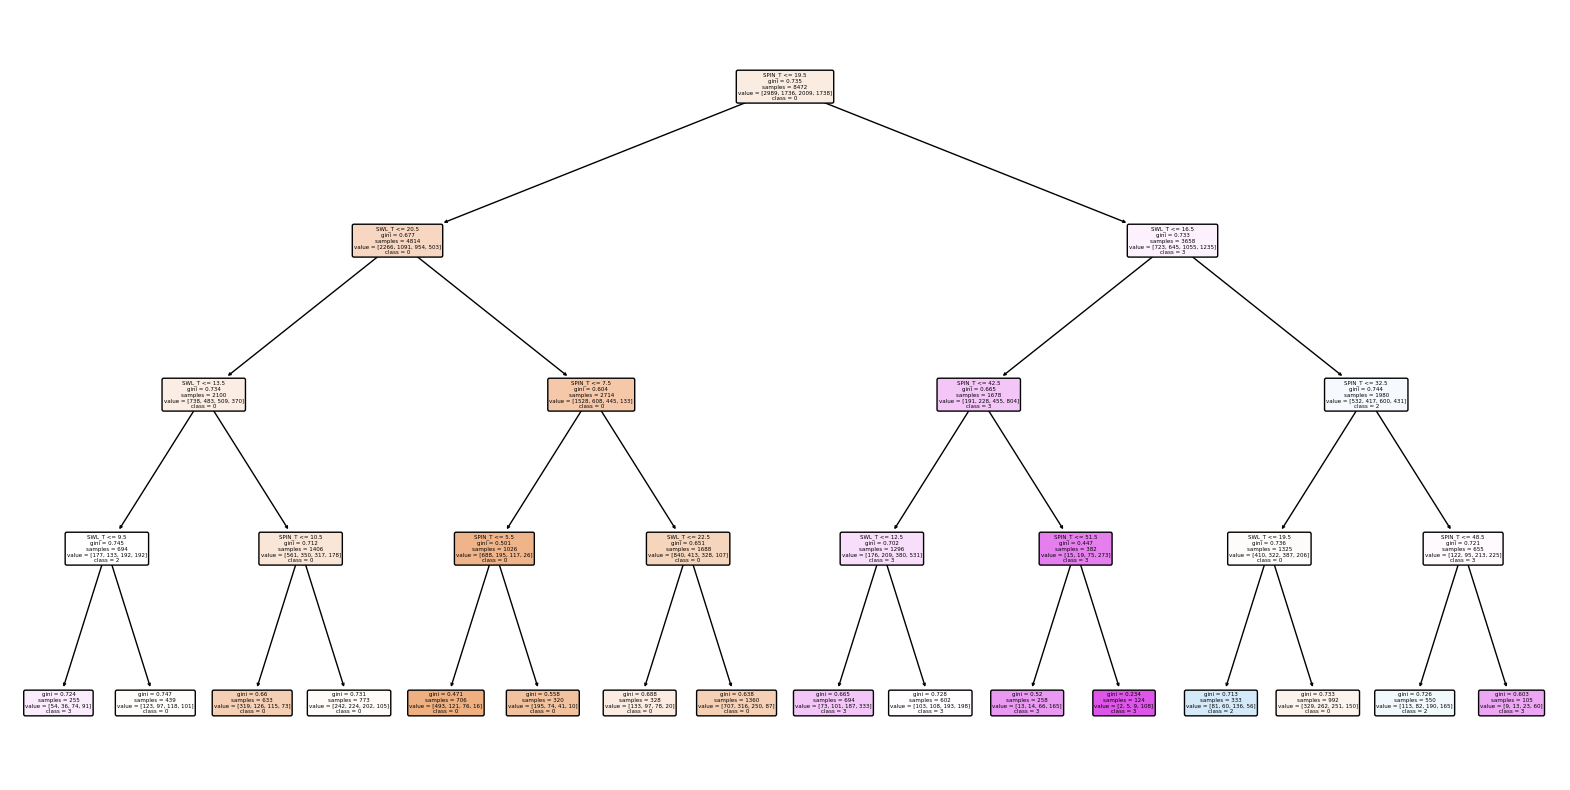

(array([[2541,    0,  194,  254],
        [1317,    0,  142,  277],
        [1131,    0,  326,  552],
        [ 562,    0,  221,  955]]),
 array([[652,   0,  45,  63],
        [295,   0,  34,  84],
        [294,   0,  68, 140],
        [140,   0,  75, 229]]),
 0.4511331444759207,
 0.5488668555240793,
 0.44785276073619634,
 0.5521472392638036)

In [ ]:
# 1. Training Decision Tree:
dt_classifier = DecisionTreeClassifier(max_depth=4)  # Limiting depth for interpretability
dt_classifier.fit(X_train_tree, y_train_tree)

# 2. Interpretation: Visualize the decision tree:
plt.figure(figsize=(20, 10))
plot_tree(dt_classifier, feature_names=X_tree.columns, class_names=["0", "1", "2", "3"], filled=True, rounded=True)
plt.show()

# 3. Predicting on training and testing datasets:
y_train_pred_tree = dt_classifier.predict(X_train_tree)
y_test_pred_tree = dt_classifier.predict(X_test_tree)

# Computing confusion matrices for training and testing:
conf_matrix_train_tree = confusion_matrix(y_train_tree, y_train_pred_tree)
conf_matrix_test_tree = confusion_matrix(y_test_tree, y_test_pred_tree)

# Computing percentages of correctly and incorrectly classified samples for training and testing:
correct_train_tree = np.trace(conf_matrix_train_tree) / np.sum(conf_matrix_train_tree)
incorrect_train_tree = 1 - correct_train_tree
correct_test_tree = np.trace(conf_matrix_test_tree) / np.sum(conf_matrix_test_tree)
incorrect_test_tree = 1 - correct_test_tree

conf_matrix_train_tree, conf_matrix_test_tree, correct_train_tree, incorrect_train_tree, correct_test_tree, incorrect_test_tree

### Understanding the issues with class 1: ( since we got 0s in the confusion matrix)

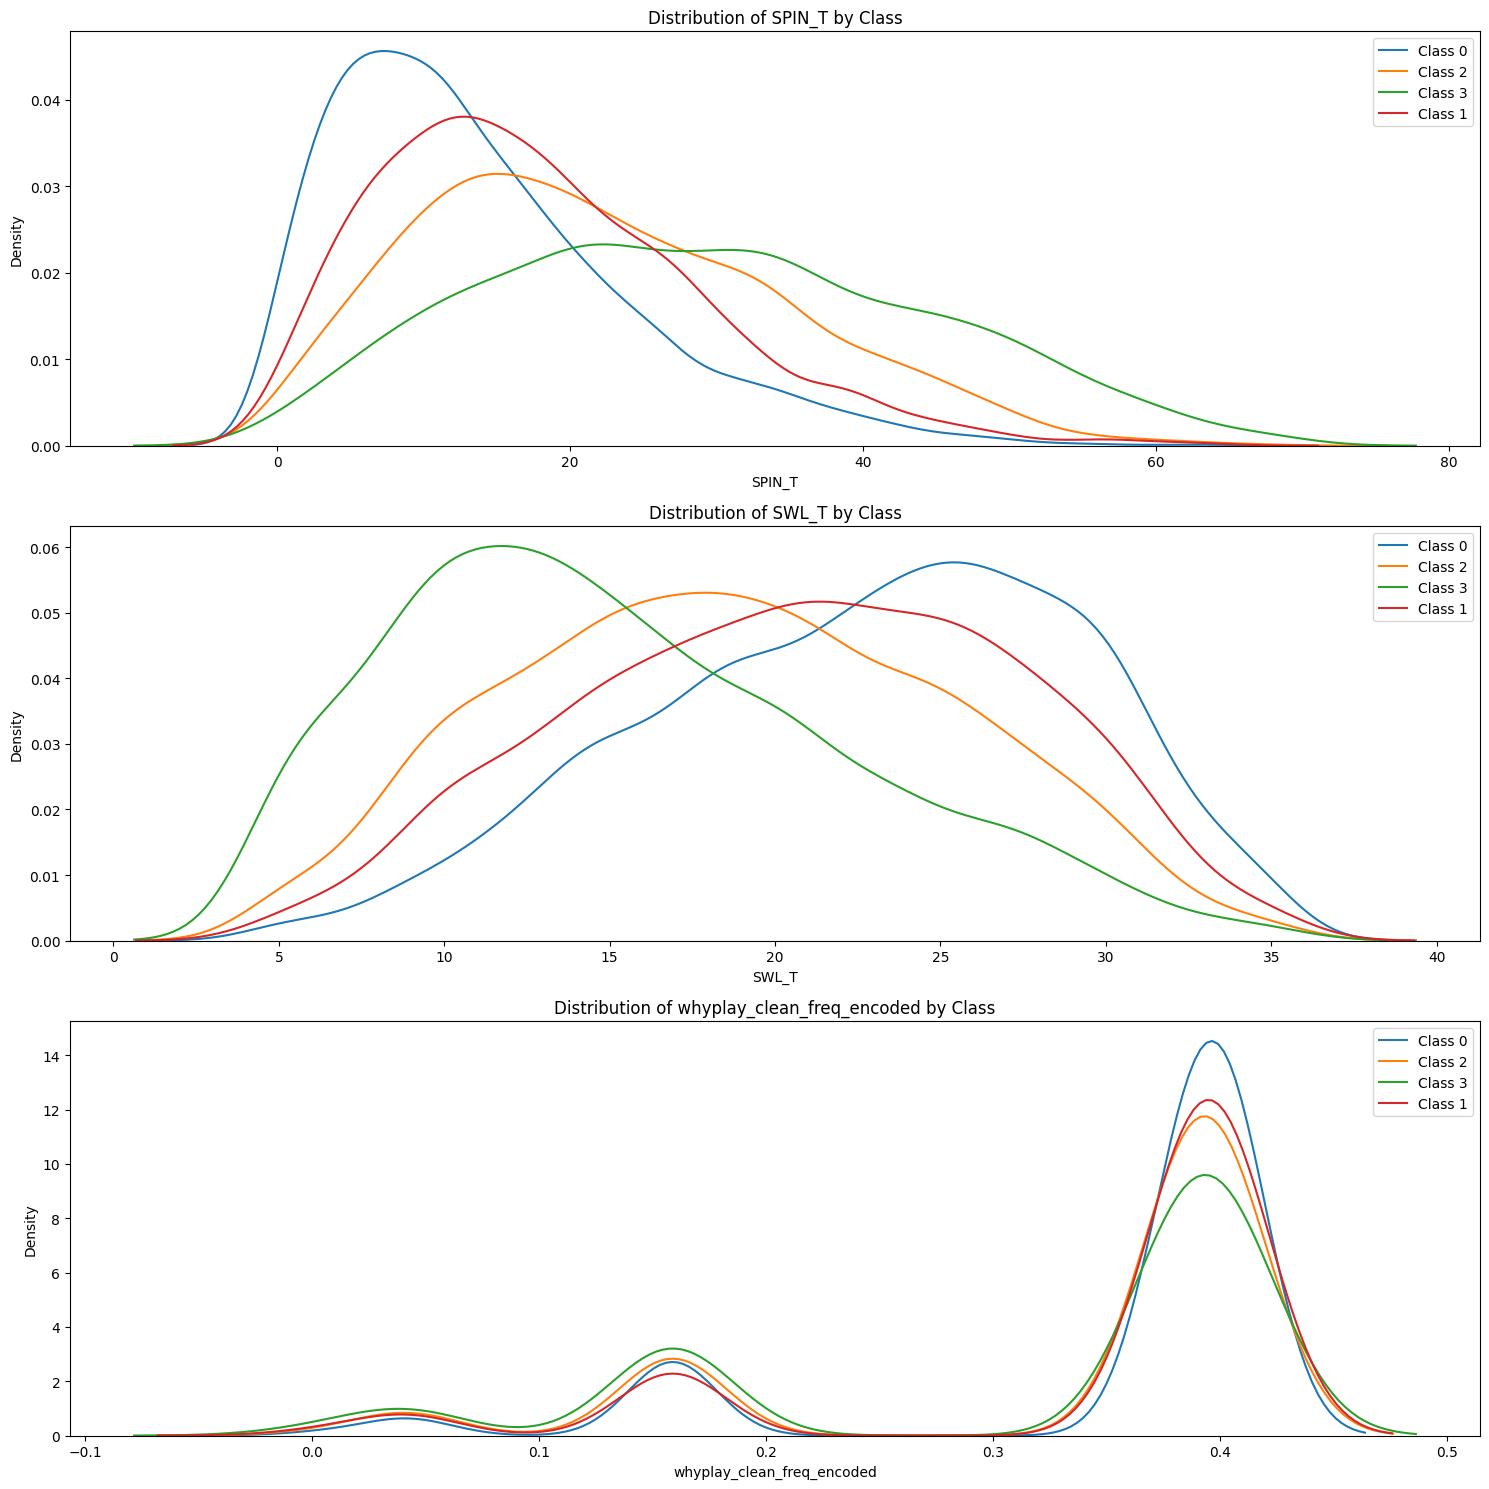

In [ ]:
# Plotting feature distributions for each class:
fig, axes = plt.subplots(nrows=len(X_tree.columns), ncols=1, figsize=(15, 15))

for i, feature in enumerate(X_tree.columns):
    for label in y_tree.unique():
        sns.kdeplot(game_df[game_df['GAD_T_class'] == label][feature], label=f'Class {label}', ax=axes[i])
    axes[i].set_title(f'Distribution of {feature} by Class')
    axes[i].legend()

plt.tight_layout()
plt.show()


## 3 c) Boosting Analysis


In [ ]:
# Defining different numbers of trees for boosting:
n_trees_boosting = [10, 50, 100, 200]
boosting_results = {}

for n in n_trees_boosting:
    # Training AdaBoost with the specified number of trees:
    boosting_classifier = AdaBoostClassifier(n_estimators=n, random_state=42)
    boosting_classifier.fit(X_train_tree, y_train_tree)

    # Predicting on testing dataset and compute accuracy:
    y_pred_boosting = boosting_classifier.predict(X_test_tree)
    accuracy_boosting = (y_pred_boosting == y_test_tree).mean()

    boosting_results[n] = accuracy_boosting

boosting_results

{10: 0.45115620575743276,
 50: 0.4690891930155734,
 100: 0.4676734308636149,
 200: 0.464841906559698}

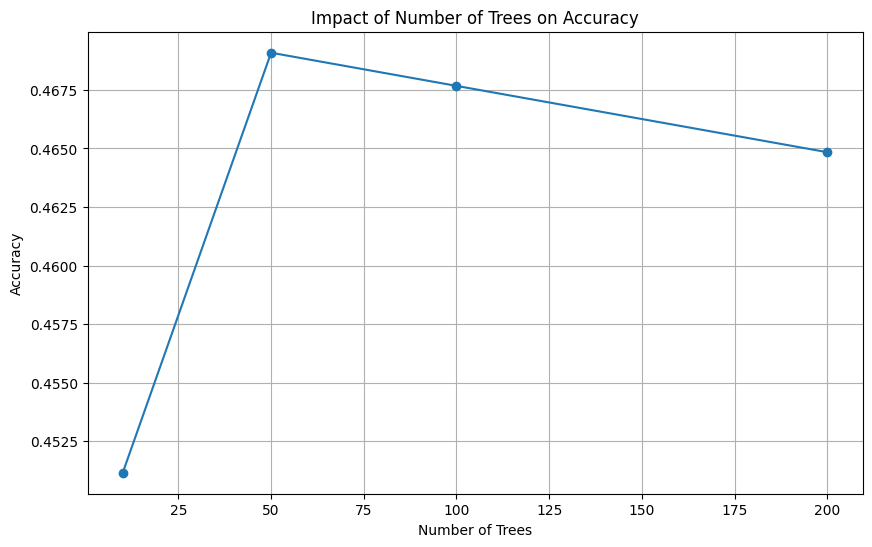

In [ ]:
# Plotting the boosting results:
plt.figure(figsize=(10, 6))
plt.plot(list(boosting_results.keys()), list(boosting_results.values()), marker='o', linestyle='-')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.title('Impact of Number of Trees on Accuracy')
plt.grid(True)
plt.show()


## 3 d) Bagging and Random Forests Analysis


In [ ]:
# Defining different numbers of trees for bagging and random forests:
n_trees_bag_rf = [10, 50, 100, 200]
bagging_results = {}
random_forest_results = {}
feature_importances_rf = {}

for n in n_trees_bag_rf:
    # Training Bagging classifier:
    bagging_classifier = BaggingClassifier(n_estimators=n, random_state=42)
    bagging_classifier.fit(X_train_tree, y_train_tree)

    # Predicting on testing dataset:
    y_pred_bagging = bagging_classifier.predict(X_test_tree)
    accuracy_bagging = (y_pred_bagging == y_test_tree).mean()

    # Computing the accuracy for bagging:
    bagging_results[n] = accuracy_bagging

    # Training Random Forest with the specified number of trees:
    random_forest_classifier = RandomForestClassifier(n_estimators=n, random_state=42)
    random_forest_classifier.fit(X_train_tree, y_train_tree)

    # Predicting on testing dataset and compute accuracy for Random Forests:
    y_pred_rf = random_forest_classifier.predict(X_test_tree)
    accuracy_rf = (y_pred_rf == y_test_tree).mean()

    random_forest_results[n] = accuracy_rf
    feature_importances_rf[n] = random_forest_classifier.feature_importances_

bagging_results, random_forest_results, feature_importances_rf


({10: 0.38414346389806514,
  50: 0.3954695611137329,
  100: 0.39263803680981596,
  200: 0.4011326097215668},
 {10: 0.38508730533270413,
  50: 0.3964134025483719,
  100: 0.39782916470033036,
  200: 0.4016045304388863},
 {10: array([0.6024941 , 0.33995189, 0.05755401]),
  50: array([0.57482615, 0.36843685, 0.056737  ]),
  100: array([0.56129486, 0.38102854, 0.0576766 ]),
  200: array([0.56222445, 0.37987567, 0.05789988])})

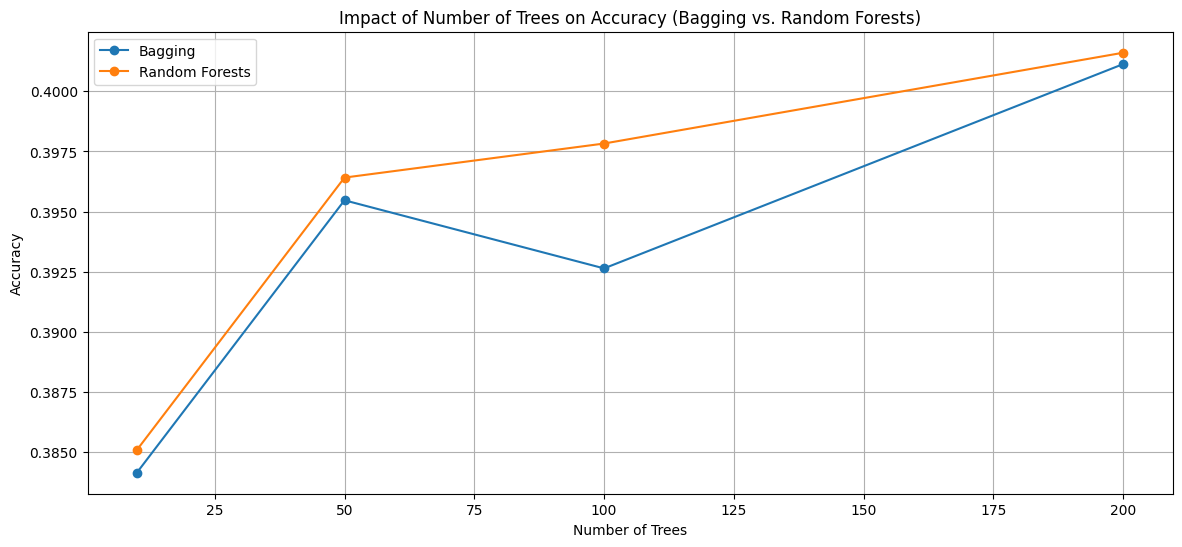

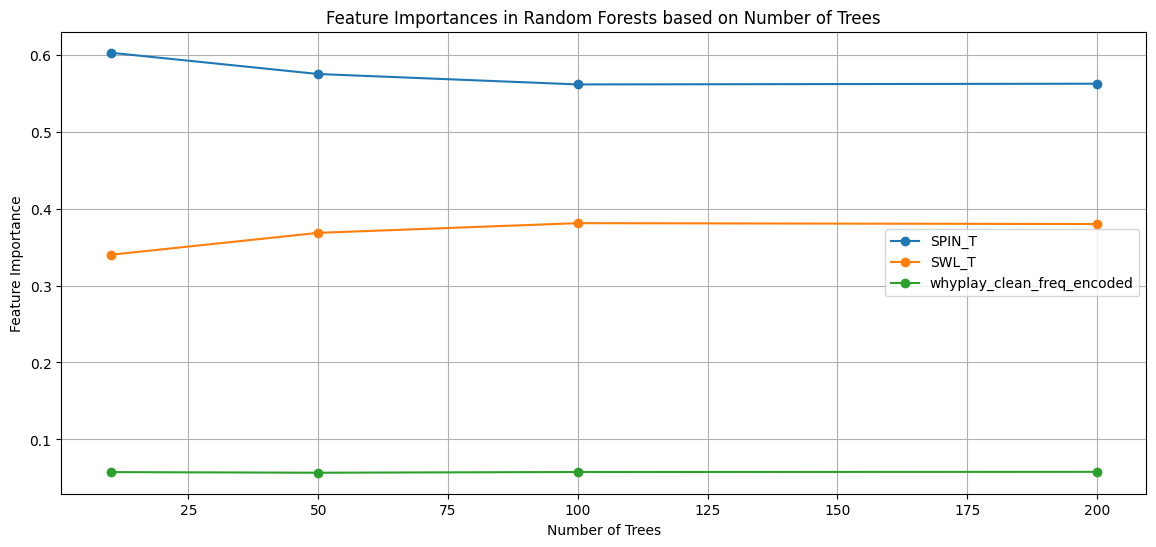

In [ ]:
# Plotting the results for Bagging and Random Forests based on the number of trees:

plt.figure(figsize=(14, 6))

# Plotting accuracy results:
plt.plot(list(bagging_results.keys()), list(bagging_results.values()), label='Bagging', marker='o', linestyle='-')
plt.plot(list(random_forest_results.keys()), list(random_forest_results.values()), label='Random Forests', marker='o', linestyle='-')

plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.title('Impact of Number of Trees on Accuracy (Bagging vs. Random Forests)')
plt.legend()
plt.grid(True)
plt.show()

# Plotting feature importances for Random Forests:
plt.figure(figsize=(14, 6))
for i, feature in enumerate(X_tree.columns):
    plt.plot(n_trees_bag_rf, [feature_importances_rf[n][i] for n in n_trees_bag_rf], label=feature, marker='o', linestyle='-')

plt.xlabel('Number of Trees')
plt.ylabel('Feature Importance')
plt.title('Feature Importances in Random Forests based on Number of Trees')
plt.legend()
plt.grid(True)
plt.show()
